In [ ]:
#pip install ydata-synthetic

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

td = pd.read_csv('/Users/leichen/Desktop/toydata.csv', header=0)

In [22]:


td['Time'] = pd.to_datetime(td['Time'], format='%Y/%m/%d')

daily_dates = pd.date_range(start=td['Time'].min(), end=td['Time'].max(), freq='D')
df_daily = pd.DataFrame({'Time': daily_dates})

for loc in td['Location'].unique():
    # df_name = f'df_{loc}'  # f-string to create the dynamic DataFrame name
    # globals()[df_name] = td[td['Location'] == loc].copy() 
    df_expanded_name = f'df_expanded_{loc}'
    df = td[td['Location'] == loc]
    df_merge = pd.merge(df_daily,df, on=['Time'], how='left').copy()
    df_merge[['Location','Dis']] = df_merge[['Location','Dis']].ffill()
    globals()[df_expanded_name] = df_merge.copy()
   

# df_sorted = df_expanded.sort_values(by=['Time'])
df_expanded_B

,Time,Consumption,Location,Dis
0,2022-05-02,0.22,B,300.0
1,2022-05-03,NaN,B,300.0
2,2022-05-04,NaN,B,300.0
3,2022-05-05,NaN,B,300.0
4,2022-05-06,NaN,B,300.0
...,...,...,...,...
346,2023-04-13,NaN,B,300.0
347,2023-04-14,NaN,B,300.0
348,2023-04-15,NaN,B,300.0
349,2023-04-16,NaN,B,300.0


In [23]:
loc = 'A'
df_name = f'df_expanded_{loc}'
df_expanded = globals()[df_name]
df_expanded_1 = df_expanded.copy()
df_expanded_1.set_index('Time', inplace=True)

# Interpolate missing values using linear interpolation
df_interpolated = df_expanded_1.interpolate(method='time')
def add_jitter(series, noise_level=0.05):
    noise = np.random.normal(0, noise_level, size=len(series))  # Gaussian noise
    jittered_series = series + noise
    return jittered_series


df_interpolated['jittered_value'] = add_jitter(df_interpolated['Consumption'], noise_level=0.02)
print(df_interpolated)

            Consumption Location    Dis  jittered_value
Time                                                   
2022-05-02     0.200000        A  150.0        0.190732
2022-05-03     0.202143        A  150.0        0.192828
2022-05-04     0.204286        A  150.0        0.209125
2022-05-05     0.206429        A  150.0        0.168163
2022-05-06     0.208571        A  150.0        0.174073
...                 ...      ...    ...             ...
2023-04-13     0.291429        A  150.0        0.291058
2023-04-14     0.293571        A  150.0        0.287798
2023-04-15     0.295714        A  150.0        0.302169
2023-04-16     0.297857        A  150.0        0.281313
2023-04-17     0.300000        A  150.0        0.310387

[351 rows x 4 columns]


/var/folders/gx/rgnxtx6n5td6bqx9y9z8745h0000gn/T/ipykernel_8926/138417250.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_expanded_1.interpolate(method='time')


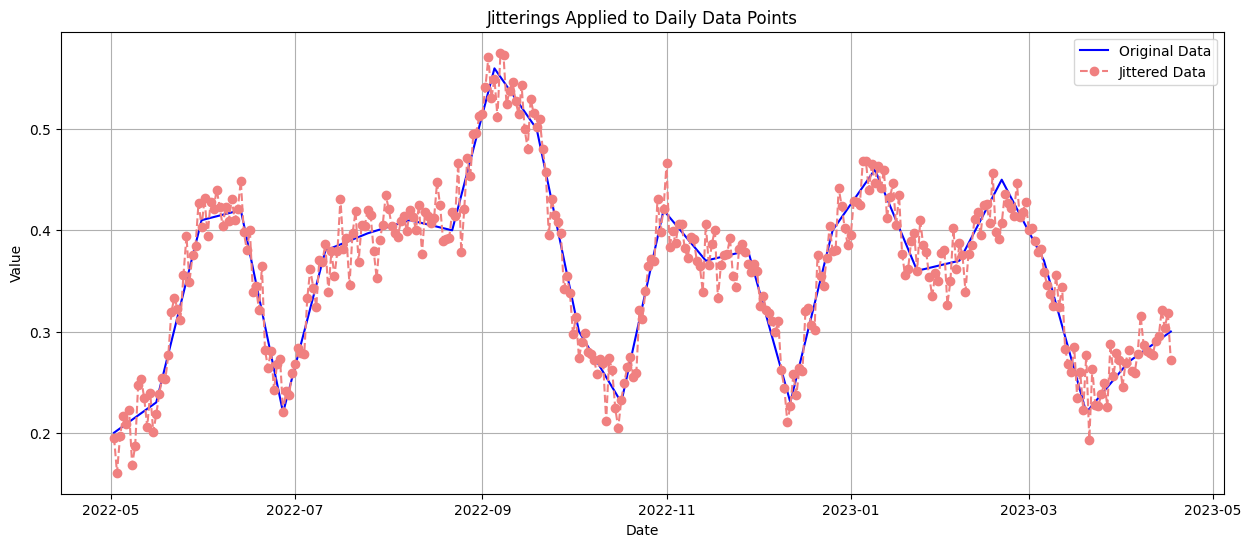

In [170]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(20,5))
# df_interpolated.plot(y = 'jittered_value',ax = ax, style = 'bo-',label='Interpolated Data')
# plt.show()

td_1 = td.loc[td['Location']=='A']

plt.figure(figsize=(15, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')
plt.plot(df_interpolated.index, df_interpolated['jittered_value'], 'o--',label='Jittered Data', color='lightcoral')

# Add labels and title
plt.title('Jitterings Applied to Daily Data Points')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
# fig, ax = plt.subplots(figsize=(20,5))
# df_interpolated.plot(y = 'Consumption',ax = ax, style = 'r-',label='Original')

In [134]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d

# # Step 1: Create a sample biweekly time series data (use your actual data here)
# date_range = pd.date_range(start='2023-01-01', periods=10, freq='2W')  # Biweekly dates
# data = np.sin(np.linspace(0, 10, 10))  # Sample sine wave data as an example

# # Create a DataFrame for biweekly data
# df_biweek = pd.DataFrame({'date': date_range, 'value': data})
# df_biweek.set_index('date', inplace=True)

# # Step 2: Expand to daily data points by resampling and interpolating missing values
# df_daily = df_biweek.resample('D').asfreq()  # Resample to daily frequency
# df_daily['value'] = df_daily['value'].interpolate(method='linear')  # Interpolate missing values

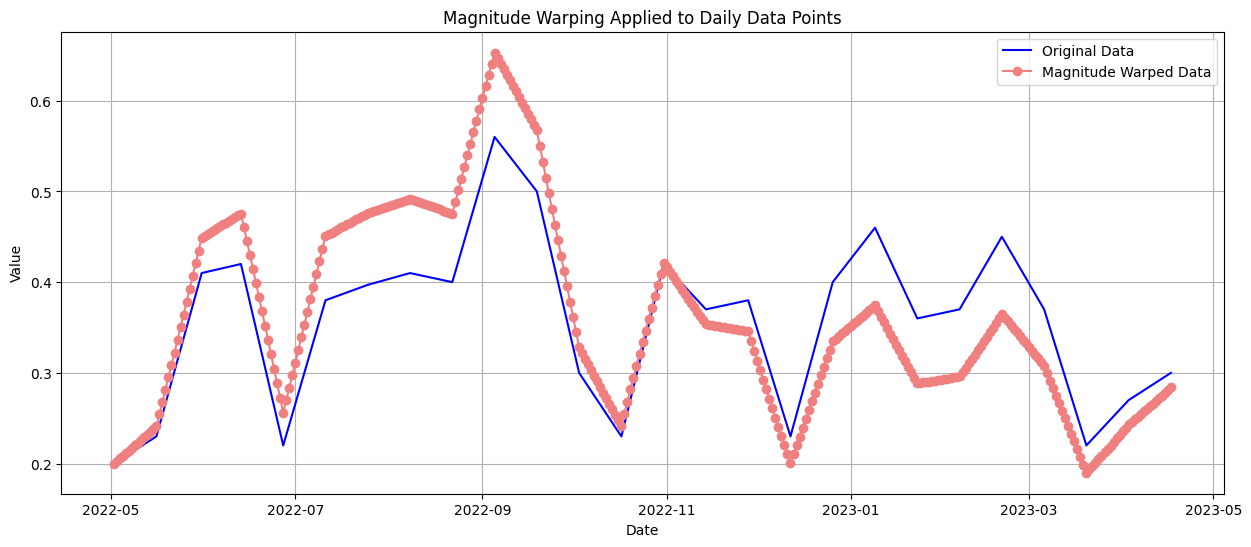

In [172]:
def magnitude_warping(series, warping_factor=0.1):
    """
    Apply magnitude warping by multiplying the time series with a smooth warping curve.
    
    Parameters:
    - series: The original time series data (Pandas Series)
    - warping_factor: Controls the amount of warping. Default is 0.1 (10% warping).
    
    Returns:
    - The warped time series.
    """
    # Create a smooth warping curve
    time_points = np.linspace(0, 1, len(series))
    random_curve = np.sin(2 * np.pi * time_points * np.random.uniform(0.5, 1.5))  # Create a smooth curve
    warping_curve = 1 + warping_factor * random_curve  # Warp the magnitude by scaling with the curve

    # Apply the warping to the original series
    warped_series = series * warping_curve
    return warped_series

# Apply magnitude warping to the interpolated daily data
df_interpolated['warped_value'] = magnitude_warping(df_interpolated['Consumption'], warping_factor=0.2)

# Step 4: Plot the original and warped data
plt.figure(figsize=(15, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')
plt.plot(df_interpolated.index, df_interpolated['warped_value'],'o-', label='Magnitude Warped Data', color='lightcoral')

# Add labels and title
plt.title('Magnitude Warping Applied to Daily Data Points')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

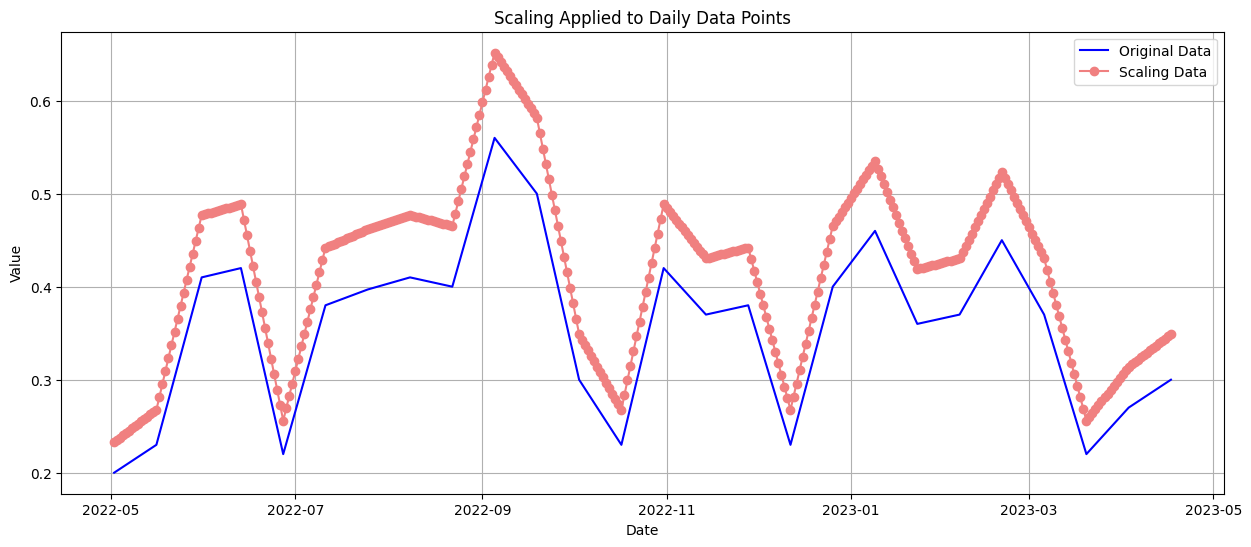

In [173]:
def apply_scaling(series, scale_factor_range=(0.9, 1.1)):
    """
    Apply scaling to the time series by multiplying it with a random scale factor.
    
    Parameters:
    - series: The original time series data (Pandas Series)
    - scale_factor_range: The range of scaling factors to be applied (default is 0.9 to 1.1).
    
    Returns:
    - The scaled time series.
    """
    # Generate a random scaling factor within the given range
    scale_factor = np.random.uniform(scale_factor_range[0], scale_factor_range[1])
    
    # Apply scaling to the series
    scaled_series = series * scale_factor
    return scaled_series

# Apply scaling to the interpolated daily data
df_interpolated['scaled_value'] = apply_scaling(df_interpolated['Consumption'], scale_factor_range=(0.8, 1.2))
# Step 4: Plot the original and warped data
plt.figure(figsize=(15, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')
plt.plot(df_interpolated.index, df_interpolated['scaled_value'],'o-', label='Scaling Data', color='lightcoral')

# Add labels and title
plt.title('Scaling Applied to Daily Data Points')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

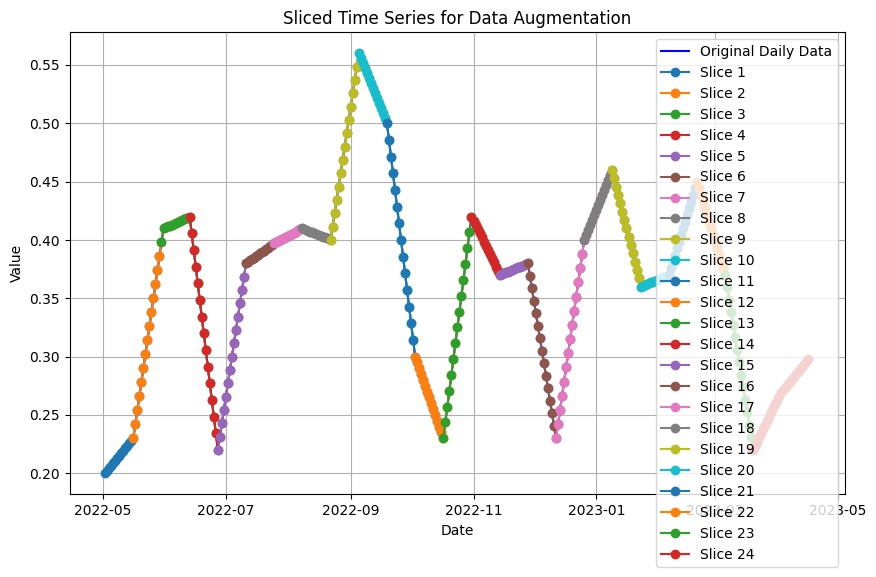

In [191]:
def slice_time_series(series, window_size, step_size=1):
    """
    Slice the time series into windows for augmentation.
    
    Parameters:
    - series: The original time series data (Pandas Series)
    - window_size: The number of data points in each slice
    - step_size: The step size for sliding the window (default is 1)
    
    Returns:
    - A list of sliced windows (each window is a sub-series of the original series)
    """
    sliced_windows = []
    
    # Loop through the series, creating slices of the specified window size
    for start_idx in range(0, len(series) - window_size + 1, step_size):
        window = series[start_idx:start_idx + window_size]
        sliced_windows.append(window)
    
    return sliced_windows

window_size = 28  # Two weeks (14 daily points)
step_size = 14  # Slide by one week (7 days)

# Slice the daily time series into sliding windows
sliced_windows = slice_time_series(df_interpolated['Consumption'], window_size, step_size)

plt.figure(figsize=(10, 6))

# Plot original daily data
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Daily Data', color='blue')

# Plot the first few sliced windows (as individual time series)
for i, window in enumerate(sliced_windows):
    plt.plot(window.index, window.values, 'o-', label=f'Slice {i+1}')

# Add labels and title
plt.title('Sliced Time Series for Data Augmentation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

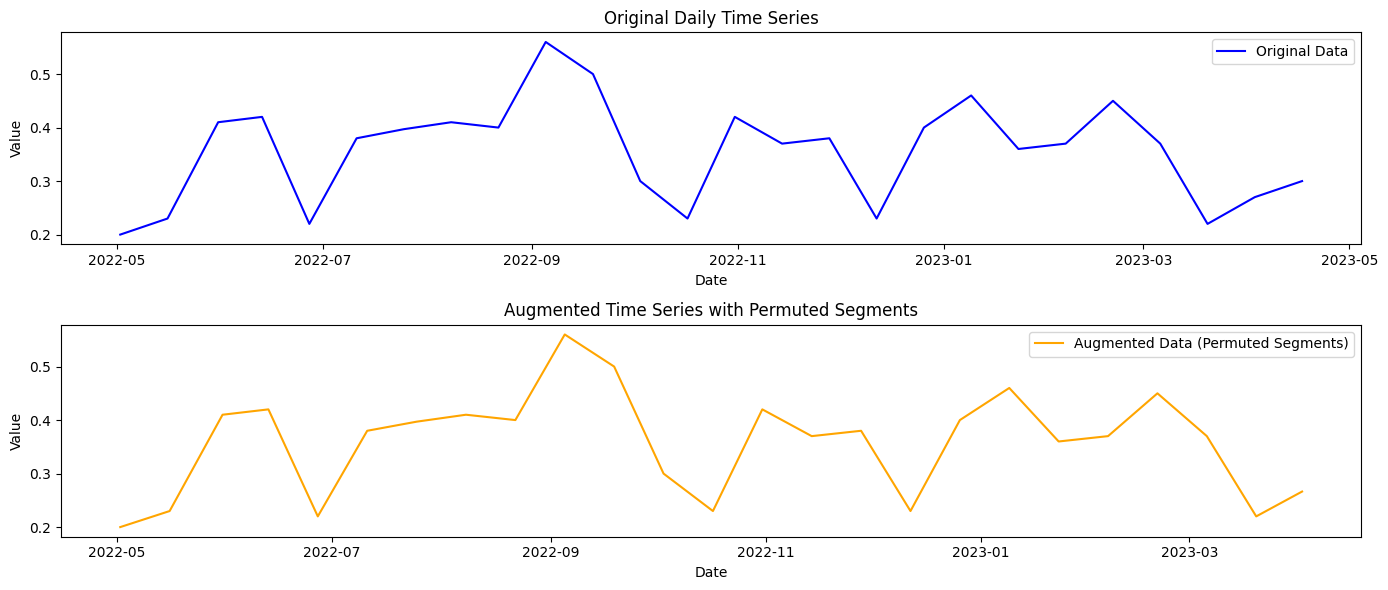

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Step 2: Segment the time series
def segment_time_series(series, segment_size):
    """
    Divide the time series into segments of equal length.

    Parameters:
    - series: Pandas Series representing the time series data.
    - segment_size: The number of data points in each segment.

    Returns:
    - A list of segments (each segment is a Pandas Series).
    """
    segments = []
    num_segments = len(series) // segment_size
    for i in range(num_segments):
        start_idx = i * segment_size
        end_idx = start_idx + segment_size
        segment = series.iloc[start_idx:end_idx]
        segments.append(segment)
    return segments

# Define segment size (e.g., 14 days)
segment_size = 56  # One week segments

# Segment the daily time series
segments = segment_time_series(df_interpolated['Consumption'], segment_size)

# Step 3: Permute the segments
def permute_segments(segments):
    """
    Shuffle the order of segments.

    Parameters:
    - segments: List of Pandas Series segments.

    Returns:
    - A new list of segments in shuffled order.
    """
    permuted_segments = shuffle(segments, random_state=12)
    return permuted_segments

# Generate augmented data by permuting segments
permuted_segments = permute_segments(segments)

# Concatenate the permuted segments to form the augmented time series
df_augmented = pd.concat(permuted_segments)
df_augmented = df_augmented.to_frame(name='value')

# Ensure the index is continuous (in case of any gaps due to slicing)
df_augmented = df_augmented.asfreq('D')

# Step 4: Plot the original and augmented time series
plt.figure(figsize=(14, 6))

# Plot original daily data
plt.subplot(2, 1, 1)
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')
plt.title('Original Daily Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot augmented data
plt.subplot(2, 1, 2)
plt.plot(df_augmented.index, df_augmented['value'], label='Augmented Data (Permuted Segments)', color='orange')
plt.title('Augmented Time Series with Permuted Segments')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

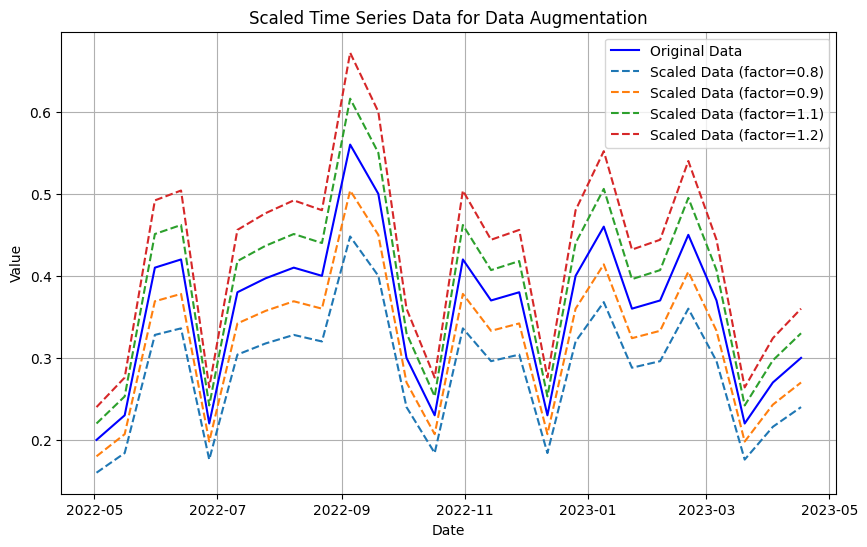

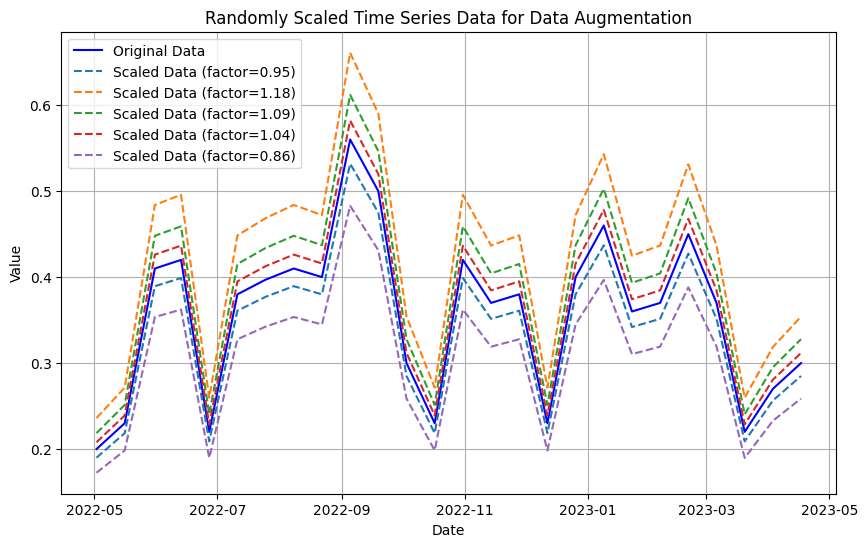

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 3: Apply scaling to the interpolated data
def apply_scaling(series, scale_factor):
    return series * scale_factor

scale_factors = [0.8, 0.9, 1.1, 1.2]
scaled_data = {}

for factor in scale_factors:
    scaled_series = apply_scaling(df_interpolated['Consumption'], factor)
    scaled_data[f'scaled_{factor}'] = scaled_series

# Plot scaled data
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')

for factor in scale_factors:
    plt.plot(df_interpolated.index, scaled_data[f'scaled_{factor}'],label=f'Scaled Data (factor={factor})', linestyle='--')

plt.title('Scaled Time Series Data for Data Augmentation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Additional random scaling
np.random.seed(42)
random_factors = np.random.uniform(0.8, 1.2, size=5)

for factor in random_factors:
    scaled_series = apply_scaling(df_interpolated['Consumption'], factor)
    scaled_data[f'scaled_{factor:.2f}'] = scaled_series

# Plot randomly scaled data
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')

for factor in random_factors:
    plt.plot(df_interpolated.index, scaled_data[f'scaled_{factor:.2f}'],
             label=f'Scaled Data (factor={factor:.2f})', linestyle='--')

plt.title('Randomly Scaled Time Series Data for Data Augmentation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

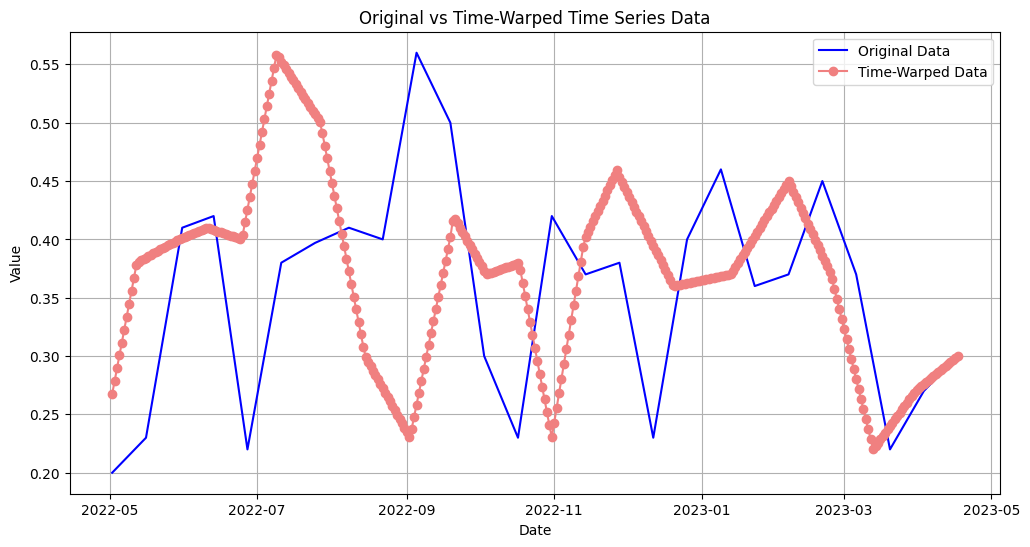

In [21]:
# Define the time warping function
def time_warp(series, sigma=0.2, knot=4):
    orig_time = np.linspace(0, 1, len(series))
    random_warp = np.random.normal(loc=1.0, scale=sigma, size=(knot+2,))
    warp_knots = np.linspace(0, 1, knot+2)
    cumulative_warp = np.cumsum(random_warp)
    cumulative_warp = cumulative_warp / cumulative_warp[-1]
    time_warp_function = interp1d(warp_knots, cumulative_warp, kind='linear')
    warped_time = time_warp_function(orig_time)
    warped_time = np.clip(warped_time, 0, 1)
    series_interpolator = interp1d(orig_time, series.values, kind='linear', fill_value="extrapolate")
    warped_series_values = series_interpolator(warped_time)
    warped_series = pd.Series(data=warped_series_values, index=series.index)
    return warped_series

# Apply time warping
df_interpolated['time_warped_value'] = time_warp(df_interpolated['Consumption'], sigma=0.2, knot=4)

# Plot the original and time-warped data
plt.figure(figsize=(12, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')
plt.plot(df_interpolated.index, df_interpolated['time_warped_value'], 'o-',label='Time-Warped Data', color='lightcoral')
plt.title('Original vs Time-Warped Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# # Generate multiple augmented series
# num_augmentations = 3
# for i in range(num_augmentations):
#     df_interpolated[f'time_warped_value_{i+1}'] = time_warp(df_interpolated['Consumption'], sigma=0.2, knot=4)

# # Plot all augmented series
# plt.figure(figsize=(12, 6))
# plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')

# for i in range(num_augmentations):
#     plt.plot(df_interpolated.index, df_interpolated[f'time_warped_value_{i+1}'],'o-',label=f'Time-Warped Data {i+1}')

# plt.title('Multiple Time-Warped Time Series for Data Augmentation')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()

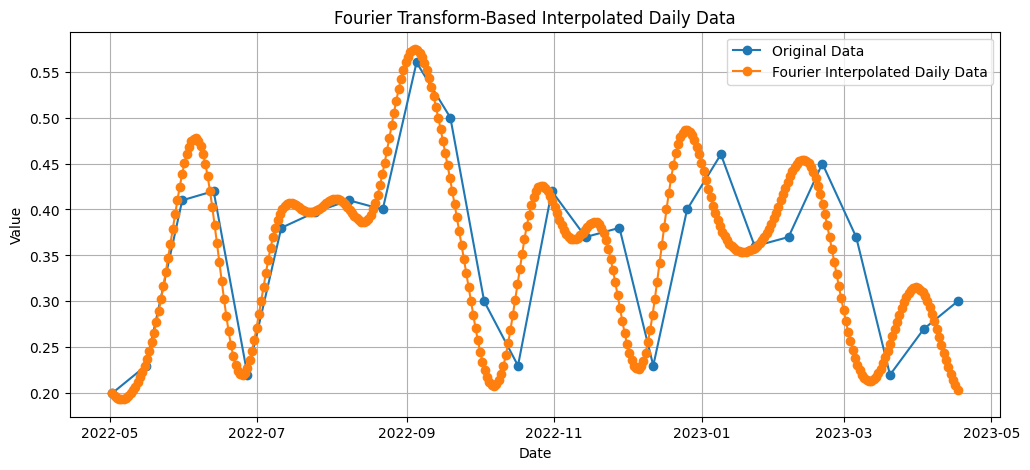

In [30]:
td = pd.read_csv('/Users/leichen/Desktop/toydata.csv', header=0, index_col=0)
td.index = pd.to_datetime(td.index)

def fourier_interpolate(y, upsample_factor):
    """
    Interpolate a time series using the Fourier Transform.

    Parameters:
    - y: Original time series values.
    - upsample_factor: Factor by which to increase the number of data points.

    Returns:
    - Interpolated time series values.
    """
    n_original = len(y)
    n_upsampled = n_original * upsample_factor

    # Compute the FFT of the original data
    y_fft = np.fft.fft(y)

    # Zero-padding in the frequency domain to increase the resolution
    y_fft_padded = np.zeros(n_upsampled, dtype=complex)
    half_n = n_original // 2
    y_fft_padded[:half_n] = y_fft[:half_n]
    y_fft_padded[-half_n:] = y_fft[-half_n:]

    # Compute the inverse FFT to get the interpolated data
    y_interpolated = np.fft.ifft(y_fft_padded).real * (n_upsampled / n_original)

    return y_interpolated

df_biweekly = td[td['Location'] == loc]
# Calculate upsample factor
upsample_factor = 14  # Number of days in two weeks

# Interpolate to daily data points
interpolated_values = fourier_interpolate(df_biweekly['Consumption'].values, upsample_factor)

# Create new date range for daily data
date_range_daily = pd.date_range(start=df_biweekly.index.min(), end=df_biweekly.index.max(), periods=len(interpolated_values))

# Create a DataFrame with interpolated daily data
df_daily = pd.DataFrame({'value': interpolated_values}, index=date_range_daily)

# Plot the interpolated daily data
plt.figure(figsize=(12, 5))
plt.plot(df_biweekly.index, df_biweekly['Consumption'], 'o-', label='Original Data')
plt.plot(df_daily.index, df_daily['value'], 'o-', label='Fourier Interpolated Daily Data')
plt.title('Fourier Transform-Based Interpolated Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Index([738277, 738291, 738306, 738319, 738333, 738347, 738361, 738375, 738389,
       738403, 738417, 738431, 738445, 738459, 738473, 738487, 738501, 738515,
       738529, 738543, 738557, 738571, 738585, 738599, 738613, 738627],
      dtype='int64', name='Time')

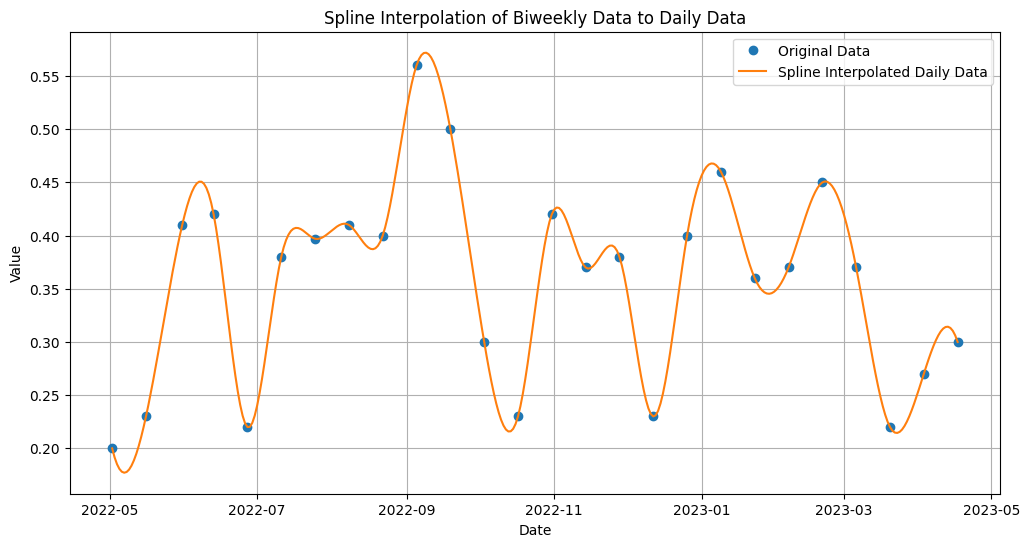

In [17]:
from scipy.interpolate import CubicSpline

td = pd.read_csv('/Users/leichen/Desktop/toydata.csv', header=0, index_col=0)
td.index = pd.to_datetime(td.index)
df_biweekly = td.loc[td['Location']=='A']


# Convert index to ordinal for interpolation
date_ord_biweekly = df_biweekly.index.map(pd.Timestamp.toordinal)

# Create cubic spline interpolator
cs = CubicSpline(date_ord_biweekly, df_biweekly['Consumption'])

# Generate daily dates
date_range_daily = pd.date_range(start=df_biweekly.index.min(), end=df_biweekly.index.max(), freq='D')
date_ord_daily = date_range_daily.map(pd.Timestamp.toordinal)

# Interpolate daily values
interpolated_values = cs(date_ord_daily)

# Create DataFrame for daily data
df_daily_spline = pd.DataFrame({'value': interpolated_values}, index=date_range_daily)

# Plot the interpolated data
plt.figure(figsize=(12, 6))
plt.plot(df_biweekly.index, df_biweekly['Consumption'], 'o', label='Original Data')
plt.plot(df_daily_spline.index, df_daily_spline['value'], '-', label='Spline Interpolated Daily Data')
plt.title('Spline Interpolation of Biweekly Data to Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df_daily_kalman = df_biweekly.resample('D').asfreq()
df_daily_kalman

,Consumption,Location,Dis
Time,,,
2022-05-02,0.2,A,150.0
2022-05-03,NaN,NaN,NaN
2022-05-04,NaN,NaN,NaN
2022-05-05,NaN,NaN,NaN
2022-05-06,NaN,NaN,NaN
...,...,...,...
2023-04-13,NaN,NaN,NaN
2023-04-14,NaN,NaN,NaN
2023-04-15,NaN,NaN,NaN


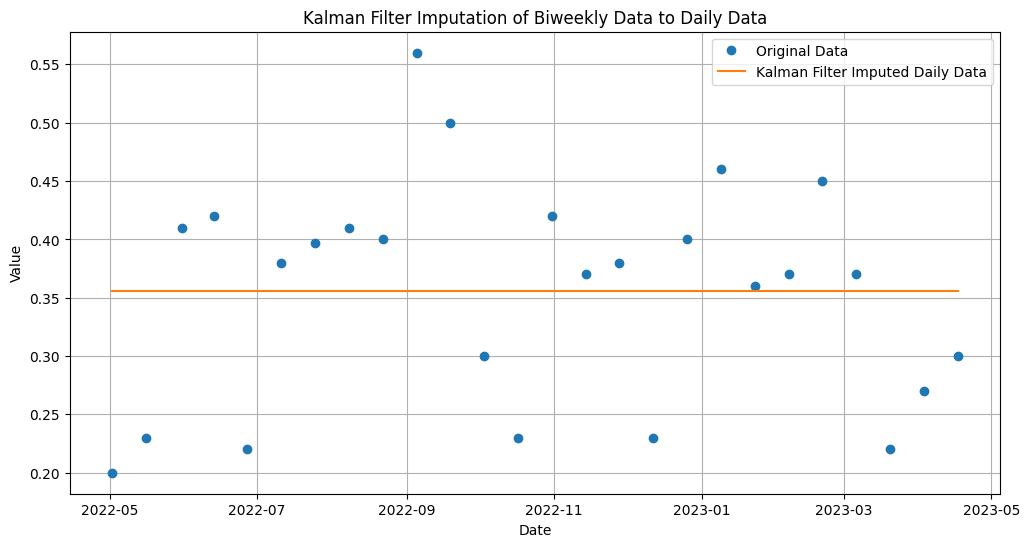

In [7]:
from statsmodels.tsa.statespace.kalman_smoother import KalmanSmoother
from statsmodels.tsa.statespace.structural import UnobservedComponents

# Resample to daily frequency without interpolation
df_daily_kalman = df_biweekly.resample('D').asfreq()

# Create the model
model = UnobservedComponents(df_daily_kalman['Consumption'], level='local level')

# Fit the model
result = model.fit(disp=False)

# Get the smoothed values (imputed data)
df_daily_kalman['Consumption'] = result.smoothed_state[0]

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df_biweekly.index, df_biweekly['Consumption'], 'o', label='Original Data')
plt.plot(df_daily_kalman.index, df_daily_kalman['Consumption'], '-', label='Kalman Filter Imputed Daily Data')
plt.title('Kalman Filter Imputation of Biweekly Data to Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

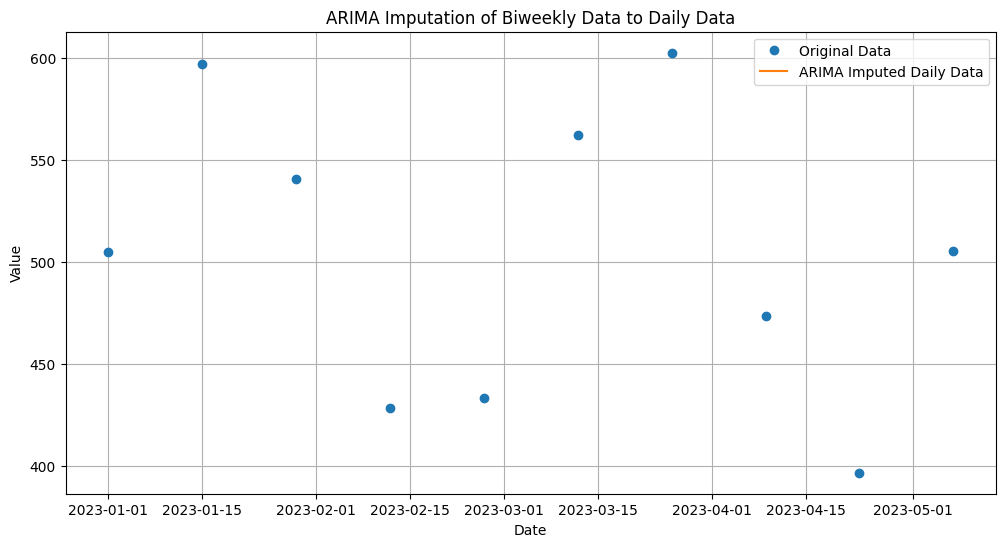

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Resample to daily frequency without interpolation
df_daily_arima = df_biweekly.resample('D').asfreq()

# Identify and fit the ARIMA model
# Since we have limited data, we'll use a simple ARIMA(1,1,1) model
model = ARIMA(df_biweekly['Consumption'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the missing values
start_date = df_daily_arima.index.min()
end_date = df_daily_arima.index.max()
forecast = model_fit.predict(start=start_date, end=end_date)

# Impute missing values
df_daily_arima['value'] = forecast

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df_biweekly.index, df_biweekly['Consumption'], 'o', label='Original Data')
plt.plot(df_daily_arima.index, df_daily_arima['Consumption'], '-', label='ARIMA Imputed Daily Data')
plt.title('ARIMA Imputation of Biweekly Data to Daily Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

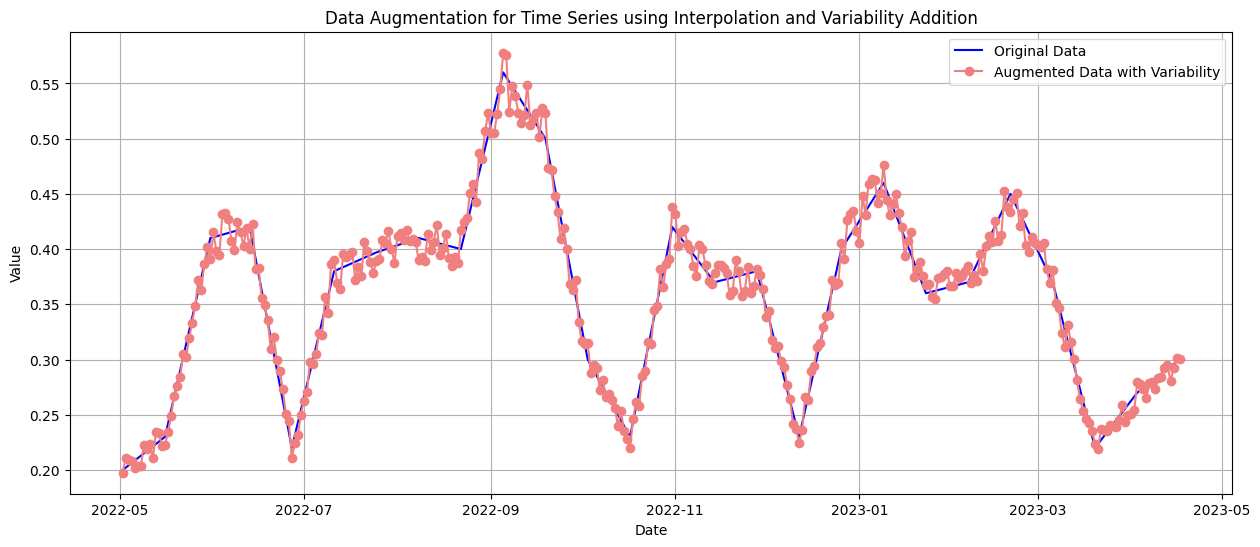

In [31]:
def add_variability(series, percentage=0.05):
    """
    Adds random variability to a series by a given percentage.
    """
    np.random.seed(42)  # For reproducibility
    variation = 1 + np.random.uniform(-percentage, percentage, size=len(series))
    return series * variation

# Apply variability
df_interpolated['augmented_value'] = add_variability(df_interpolated['Consumption'], percentage=0.05)

# Plot the augmented data
plt.figure(figsize=(15, 6))
plt.plot(df_interpolated.index, df_interpolated['Consumption'], label='Original Data', color='blue')
plt.plot(df_interpolated.index, df_interpolated['augmented_value'], 'o-',label='Augmented Data with Variability', color='lightcoral')
# plt.scatter(df_interpolated.index, df_interpolated['Consumption'], color='blue', label='Original Biweekly Data')
plt.title('Data Augmentation for Time Series using Interpolation and Variability Addition')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()